<a href="https://colab.research.google.com/github/AmmarInsights/Honey-pot-detection-using-ML/blob/main/Signature_based_Honeypot_detection_enhanced_with_machine%C2%A0learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

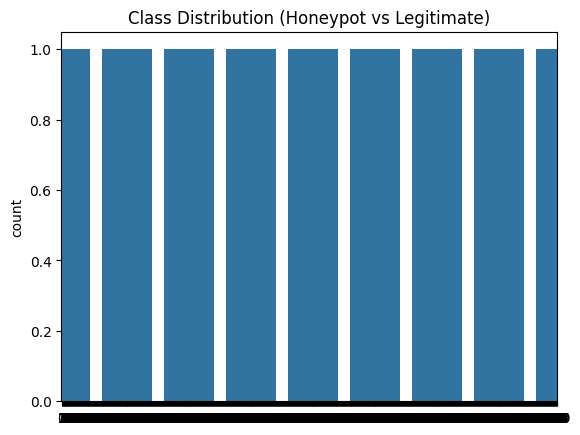

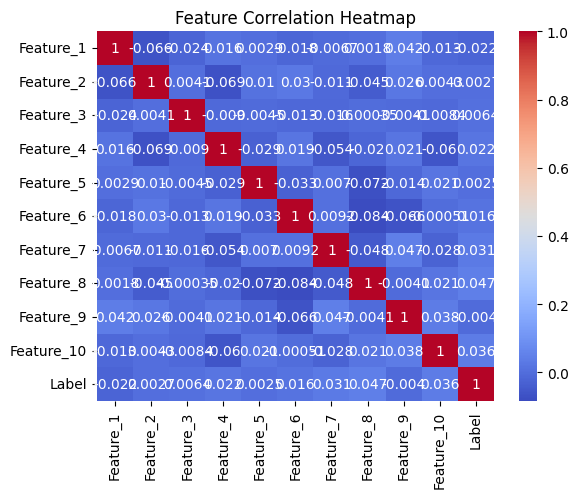

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.94      0.78       203
           1       0.14      0.02      0.04        97

    accuracy                           0.64       300
   macro avg       0.41      0.48      0.41       300
weighted avg       0.50      0.64      0.54       300



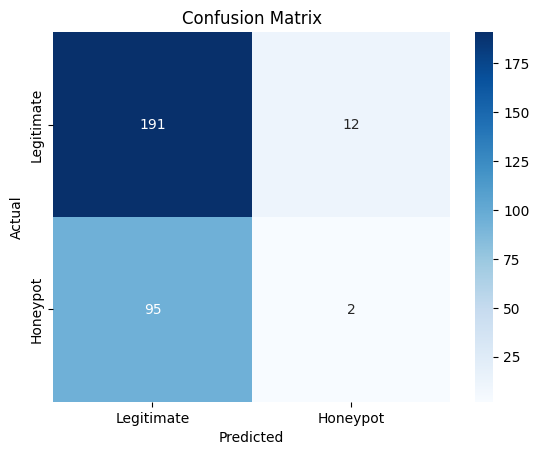

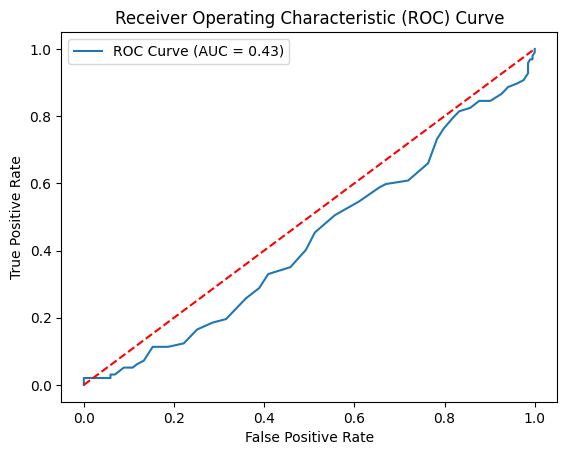

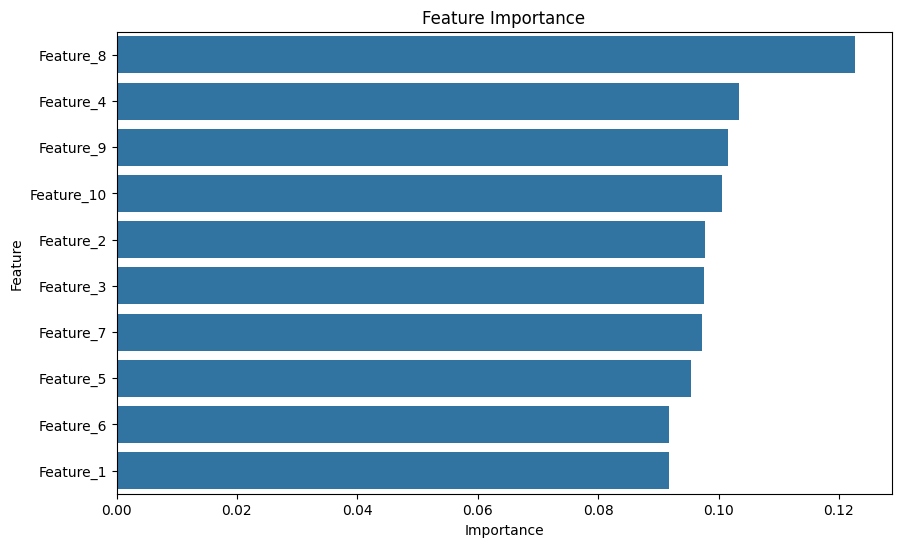

The model has been trained and evaluated with visualizations of class distribution, confusion matrix, feature importance, and ROC curve.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Simulated Data Loading
def load_data():
    # Simulated dataset for honeypot detection
    np.random.seed(42)
    data_size = 1000
    features = np.random.rand(data_size, 10)
    labels = np.random.choice([0, 1], size=data_size, p=[0.7, 0.3])  # 0: Legitimate, 1: Honeypot
    columns = [f"Feature_{i+1}" for i in range(features.shape[1])]
    dataset = pd.DataFrame(features, columns=columns)
    dataset['Label'] = labels
    return dataset

# Data Loading
data = load_data()

# Data Visualization
def visualize_data(data):
    sns.countplot(data['Label'])
    plt.title('Class Distribution (Honeypot vs Legitimate)')
    plt.show()

    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Feature Correlation Heatmap')
    plt.show()

visualize_data(data)

# Splitting Data
X = data.drop('Label', axis=1)
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Performance Metrics
def evaluate_model(y_test, y_pred, y_pred_proba):
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Honeypot'], yticklabels=['Legitimate', 'Honeypot'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

evaluate_model(y_test, y_pred, y_pred_proba)

# Feature Importance
def plot_feature_importance(clf, feature_names):
    feature_importances = pd.Series(clf.feature_importances_, index=feature_names)
    feature_importances = feature_importances.sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=feature_importances.index)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

plot_feature_importance(clf, X.columns)

# Summary
print("The model has been trained and evaluated with visualizations of class distribution, confusion matrix, feature importance, and ROC curve.")